In [11]:
library(corrplot)
library(leaps)
library(dplyr)
library(ggplot2)
library(GGally)
library(tidyverse)
library(caret)
library(glmnet)
library(car)
library(broom)
library(tidyr)
library(gridExtra)


corrplot 0.92 loaded



## Read the Data:

In [12]:
 urlfile="https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"

housing <- read.csv(urlfile)
head(housing)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
4,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
6,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


## Cleaning and Wrangling Data:

In [13]:
# Count NA values
na_count <- sum(is.na(housing))

# Count duplicates
dup_count <- sum(duplicated(housing))

# Print the counts
cat("Number of NA values:", na_count, "\n")
cat("Number of duplicates:", dup_count, "\n")


Number of NA values: 207 
Number of duplicates: 0 


In [14]:
## Romove all rows that contain NA value so that we can get clean data.
housing <- na.omit(housing)
## Make sure there is not any row containns NA value
sum(is.na(housing))
head(housing)
nrow(housing)

[1] 0

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
4,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
6,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


[1] 20433

In [15]:
## Check the mean, median and other basic infomation for each variable.
summary(housing)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1450  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.63      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.72   3rd Qu.:37.00      3rd Qu.: 3143  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 296.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5637  
 Median : 435.0   Median : 1166   Median : 409.0   Median : 3.5365  
 Mean   : 537.9   Mean   : 1425   Mean   : 499.4   Mean   : 3.8712  
 3rd Qu.: 647.0   3rd Qu.: 1722   3rd Qu.: 604.0   3rd Qu.: 4.7440  
 Max.   :6445.0   Max.   :35682   Max.   :6082.0   Max.   :15.0001  
 median_house_value ocean_proximit

## Proposal of Visualization:

- **Histogram**: to observe the distribution of all numerical variables.
> **Explanation**: From all the numerical variables, we can identify if they are follow a normal distribution in the sample. 

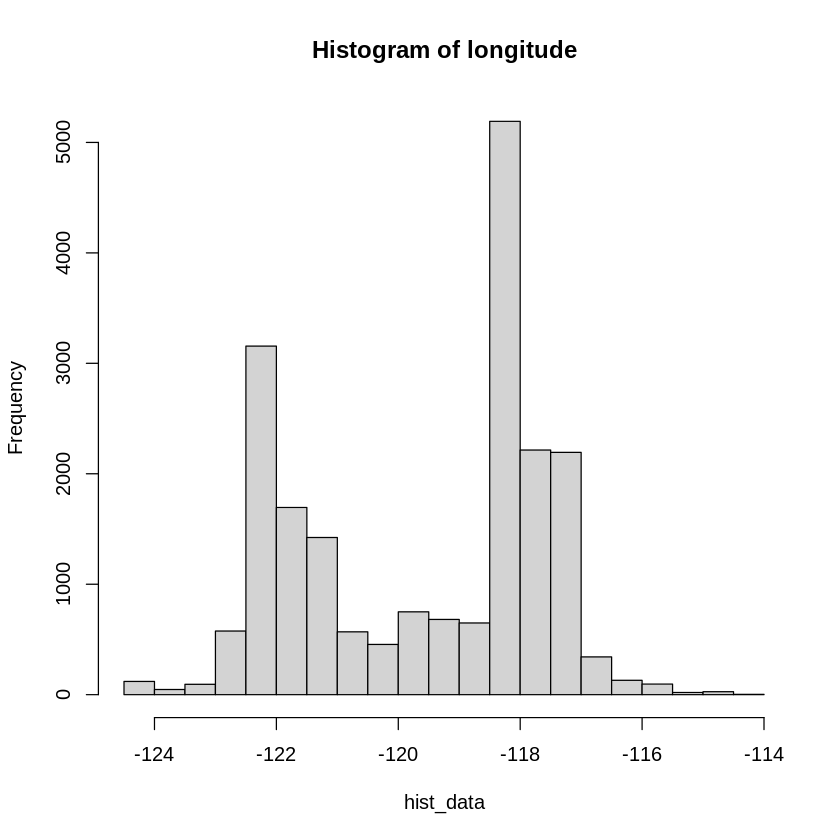

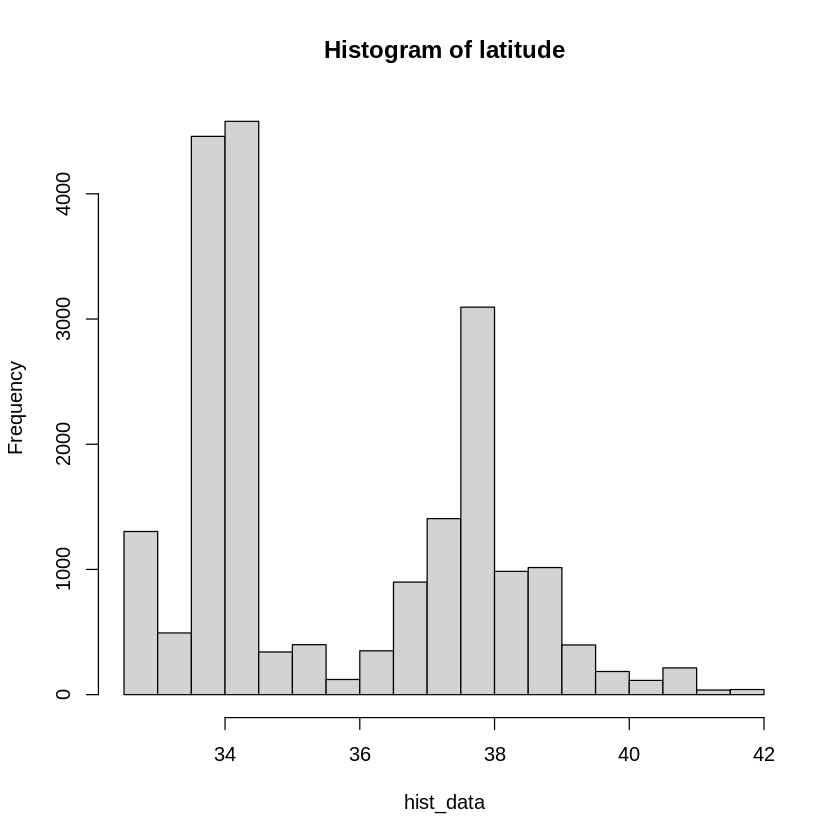

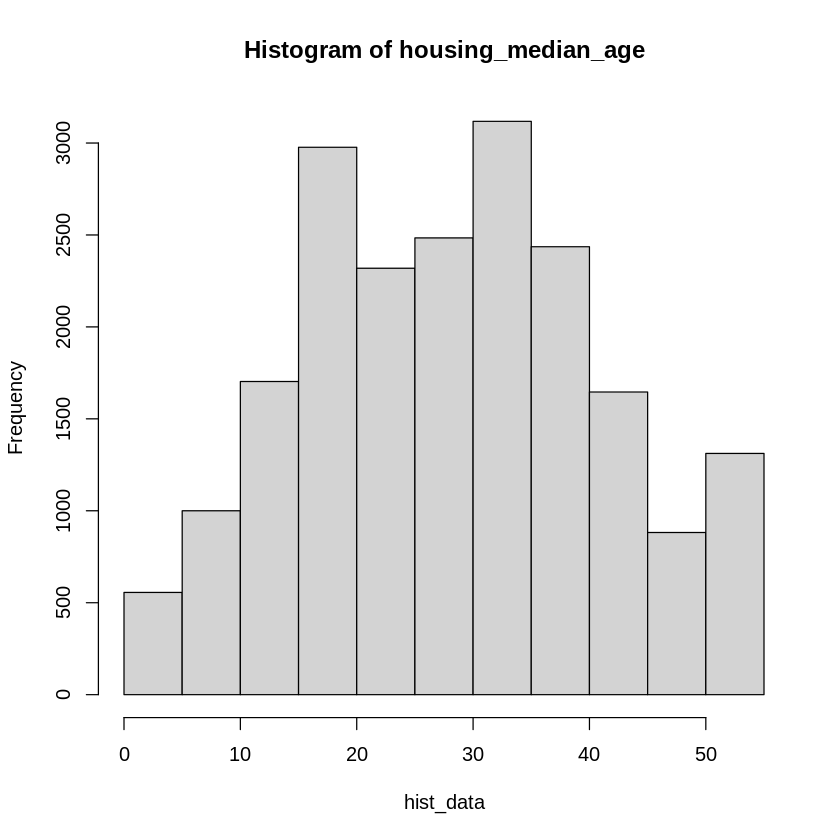

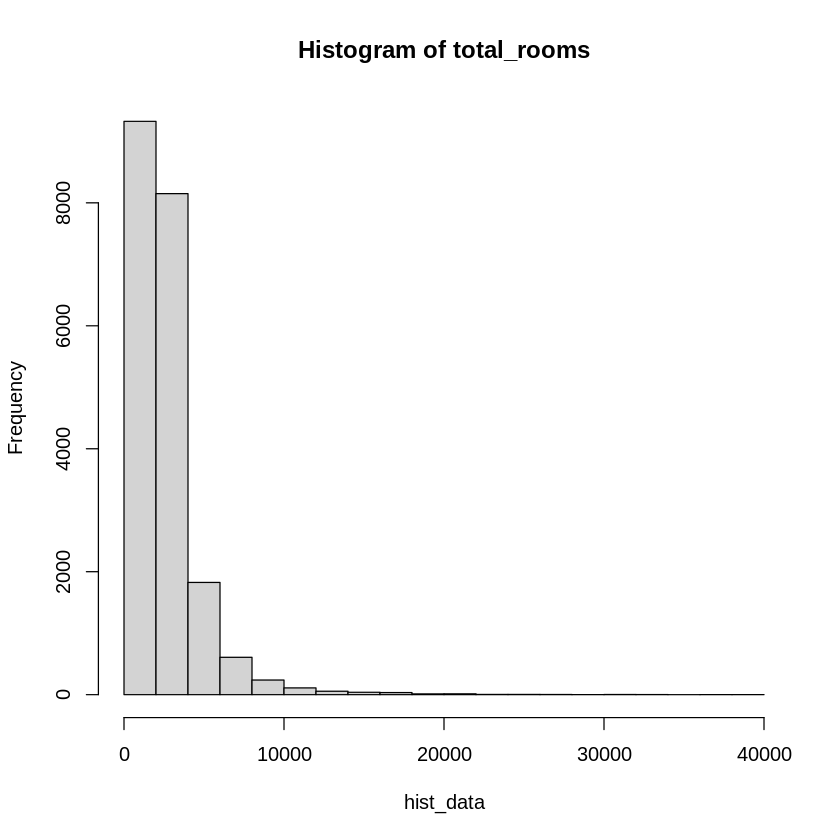

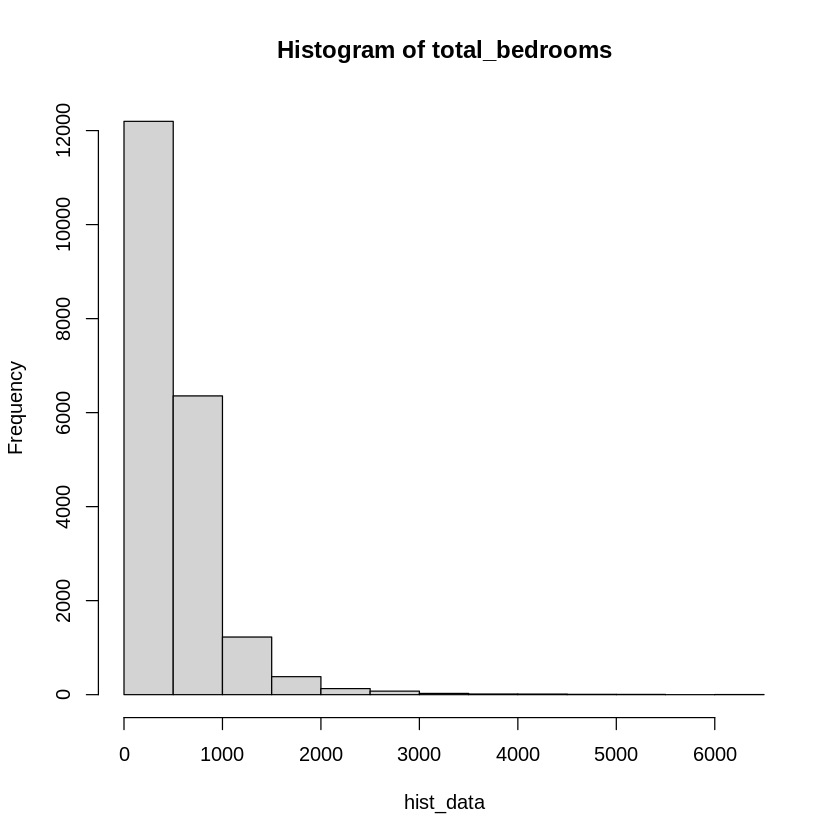

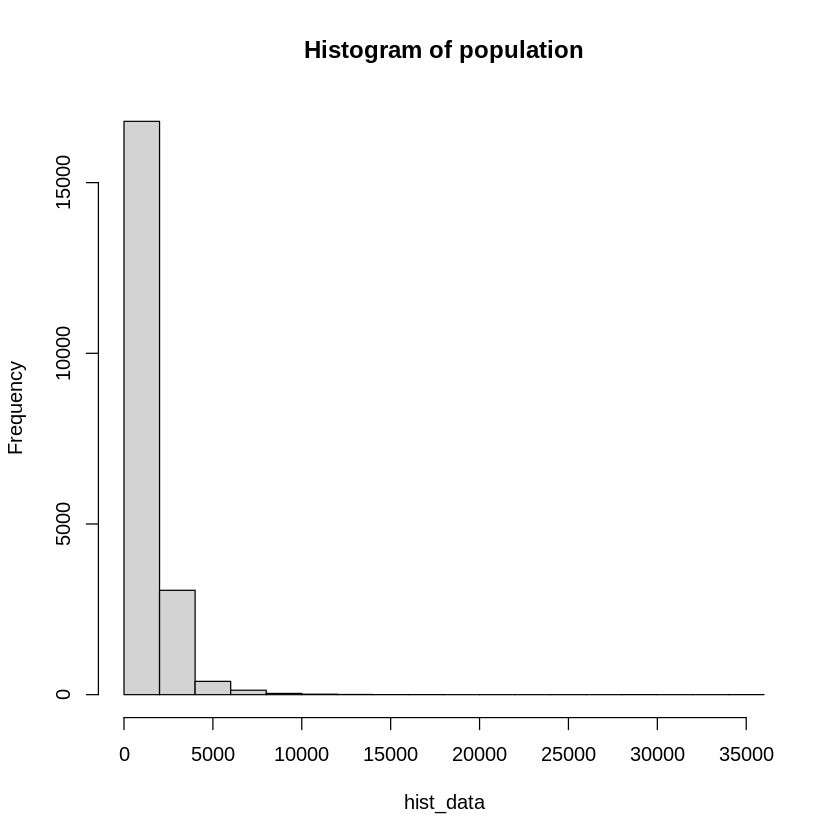

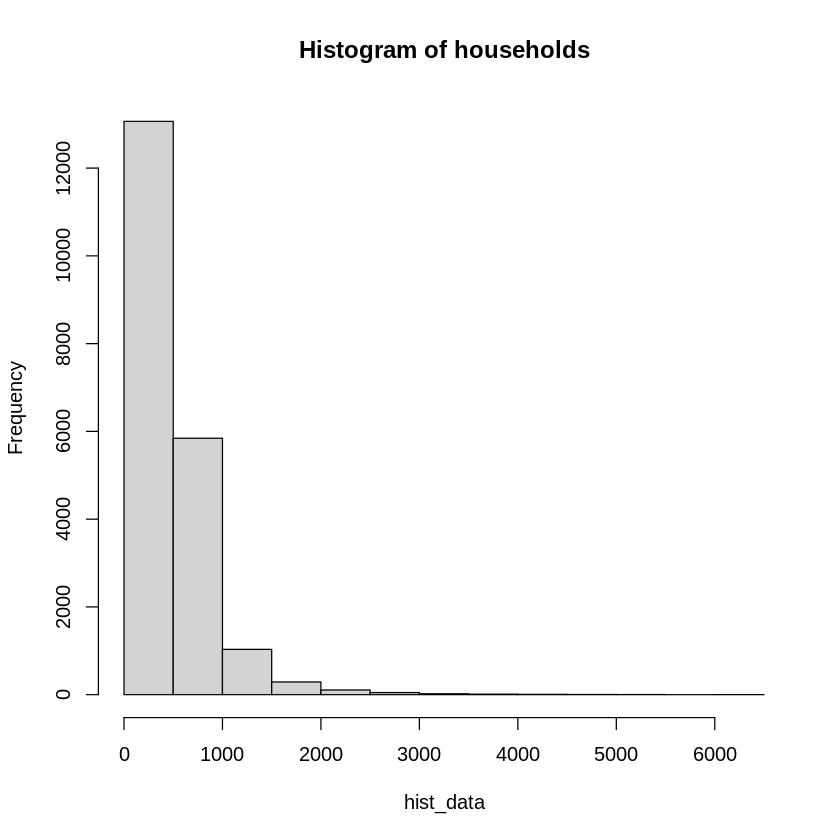

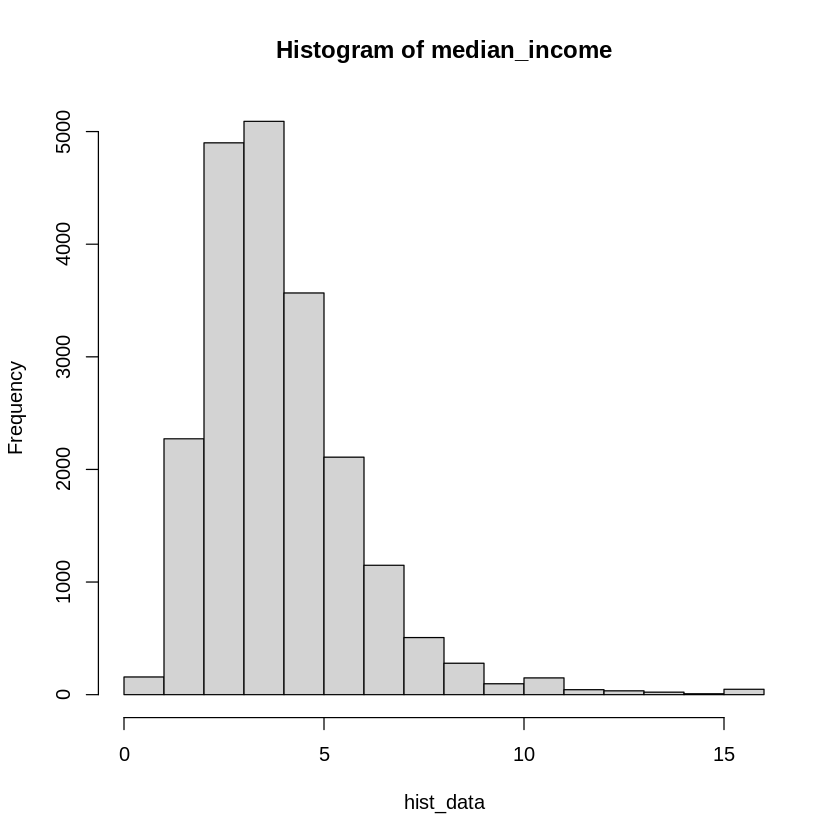

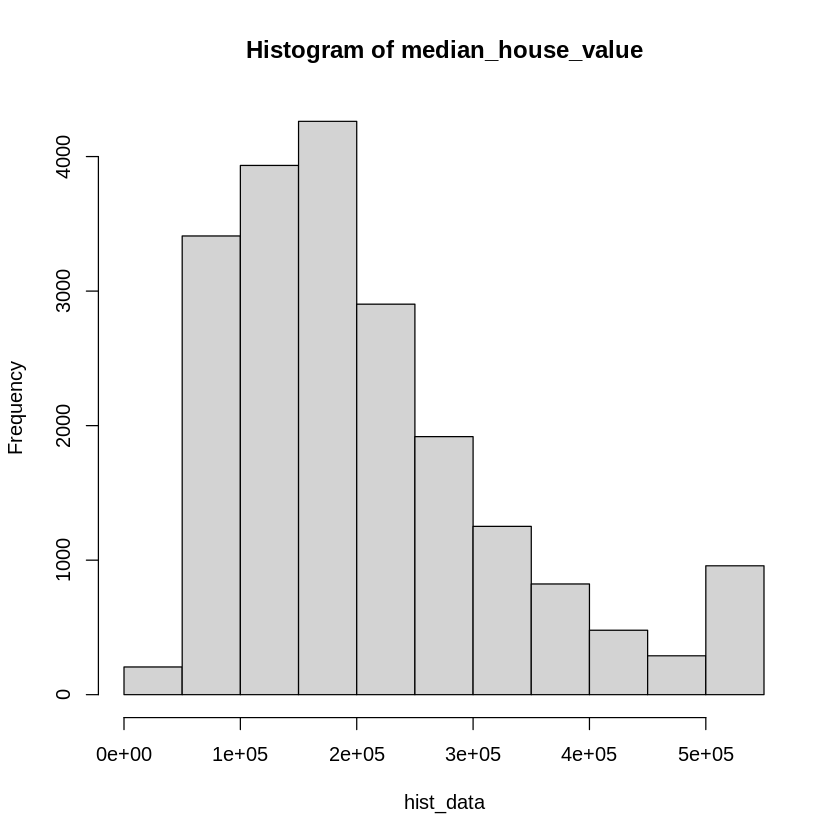

In [16]:
variables <- c("longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income",
               "median_house_value")

for (variable in variables) {
  hist_data <- housing[[variable]]  
  hist(hist_data, main = paste("Histogram of", variable))  
}

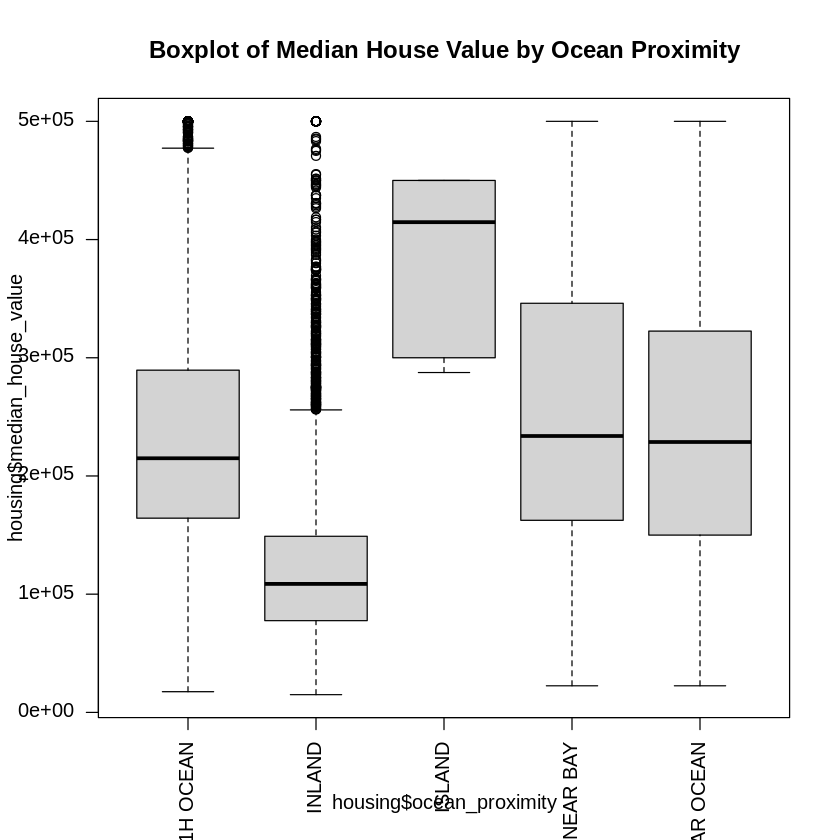

In [17]:
# Boxplot for categorical variable
boxplot(housing$median_house_value ~ housing$ocean_proximity, 
        main = "Boxplot of Median House Value by Ocean Proximity", las =2)

## Proposal of Visualization:
*Heat Map**: to observe more detailed relationships between physiochemical tests. 
> **Explanation**: A heat map helps us to identify whether **two physiochemical tests have postive or negative relationship and whether there exists multicollinearity problem** since correlations between each variables will also be shown. For physiochemical tests that are highly correlated, we could consider to drop these variables in further analysis to solve the multicollinearity problem.

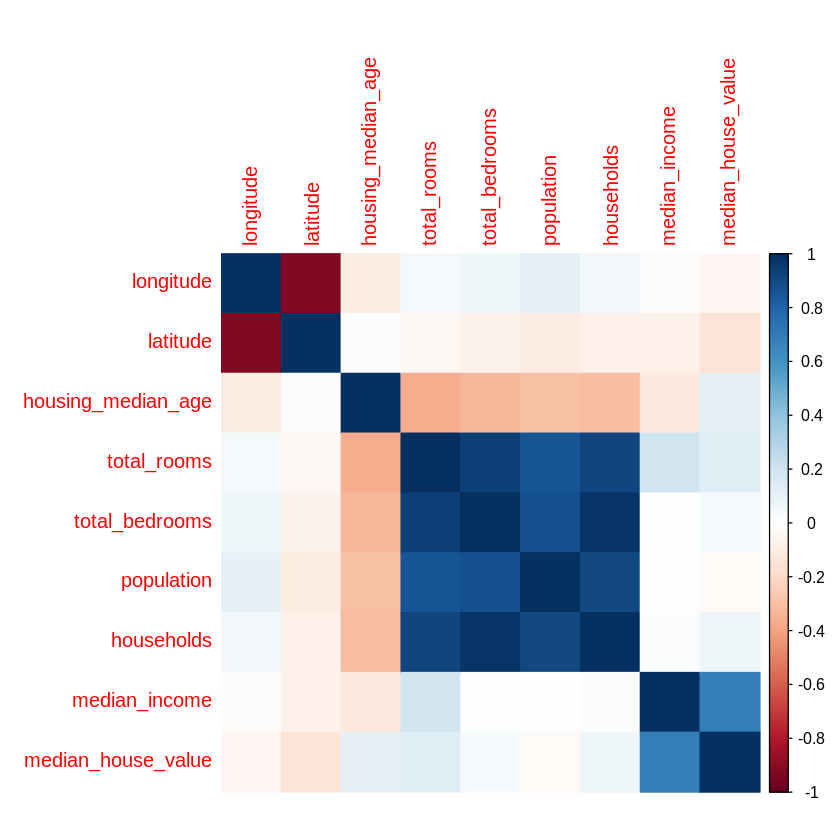

In [18]:
# Multivariate Analysis
# Correlation matrix

correlation_matrix <- cor(select(housing, -ocean_proximity))
corrplot(correlation_matrix, method = "color")

- some variables have positive relationships with each other while some have negative relationships with each other.

- There is multicollinear problem in this dataset as some physiochemical tests are correlated with each other.

    - highly positively correlated: total_rooms & total bedrooms & population& households
    - highly negatively correlated: longitude & latitude

Therefore, we could consider to drop some variables in later stage of the analysis to solve the multicollinear problem. A more detailed analysis such as vif can also be used to verify this interpretation as well. If the total rooms are more, the number of bed rooms and population for a block will be more for sure. It might be the reason caused these variables are highly correlated.

## Create a plot for longitude and latitude:

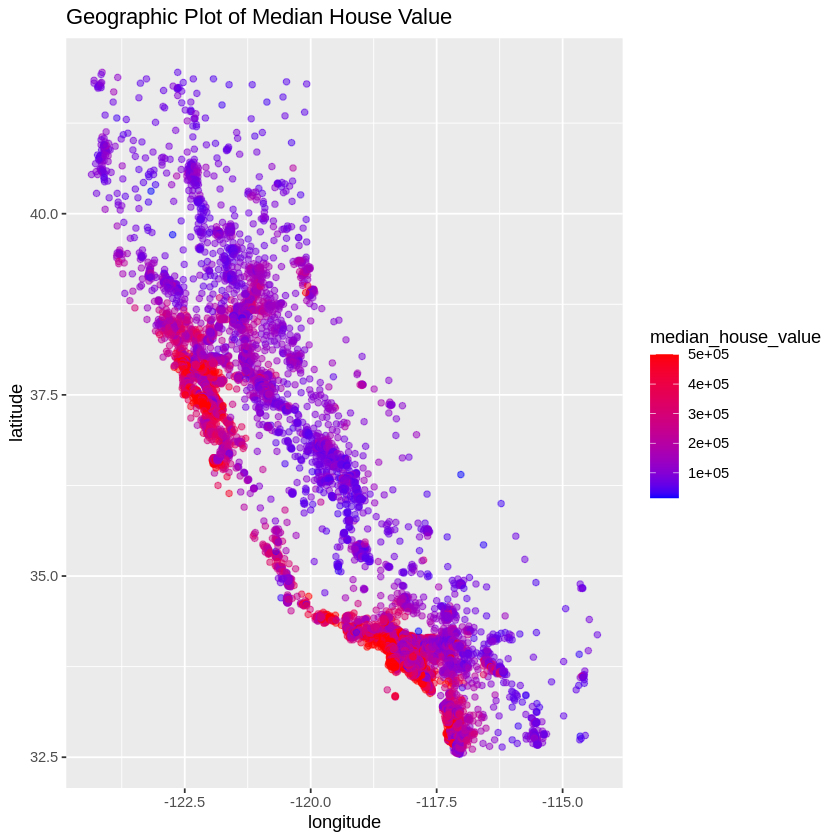

In [19]:
# Visualization
# Geographic plot
library(ggplot2)
ggplot(housing, aes(x = longitude, y = latitude, color = median_house_value)) +
  geom_point(alpha = 0.5) +
  scale_color_gradient(low = "blue", high = "red") +
  labs(title = "Geographic Plot of Median House Value")

- This plot can clearly prove the problem of longitude and latitude being highly correlated just shown in the heat map.

- Normally, we should choose to judge which value to remove by looking at the VIF value, but our team believes that the longitude and latitude of all blocks in one state (California) will not be very different. It leads to the longitude and latitude of this dataset on predicting house prices in another city may not have a strong meaning. So we decided to remove these two variables before selecting the best predictive model.

## Create the scatterplot for each numerical input variable versus reponse variable

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


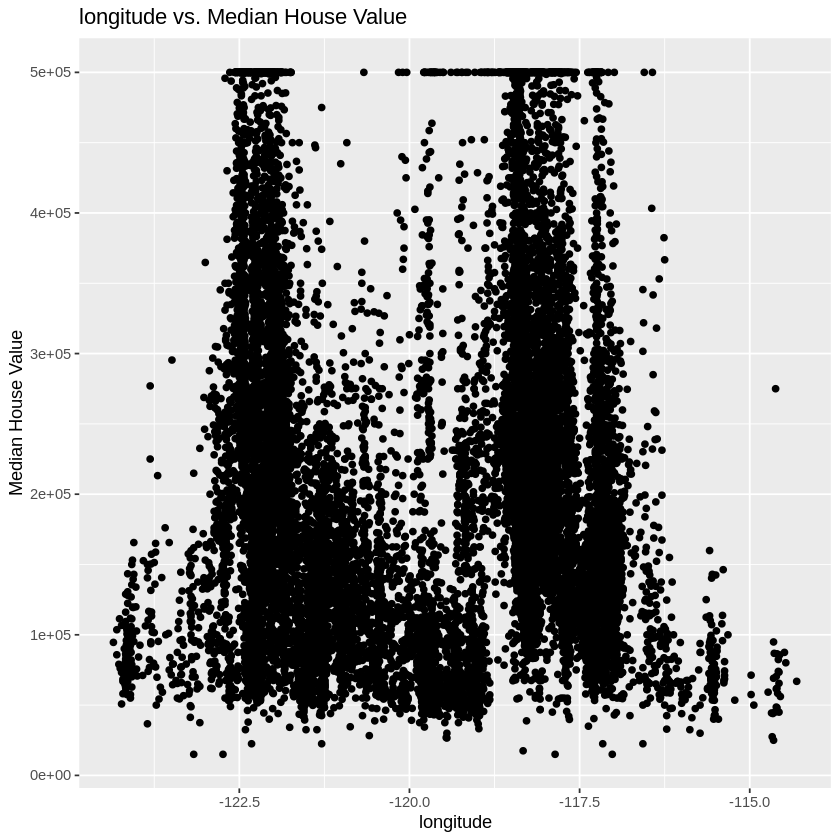

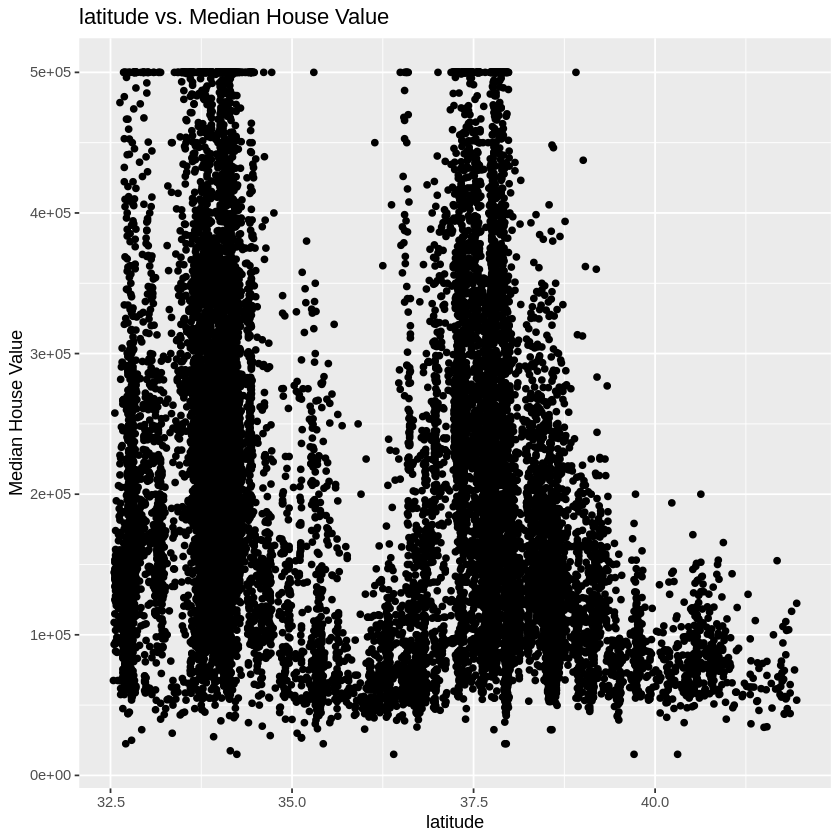

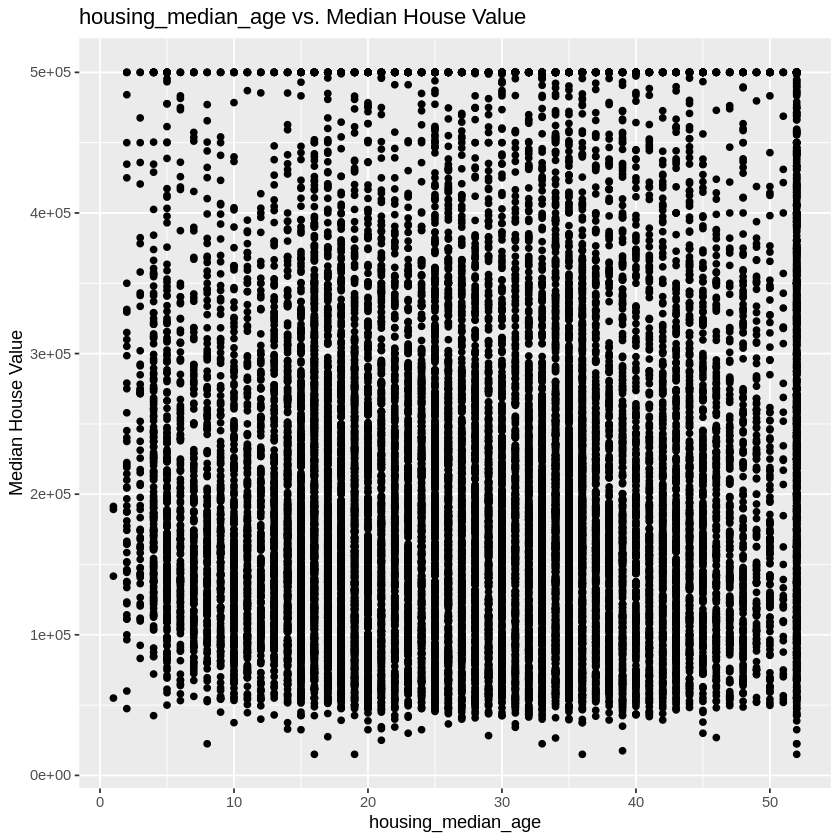

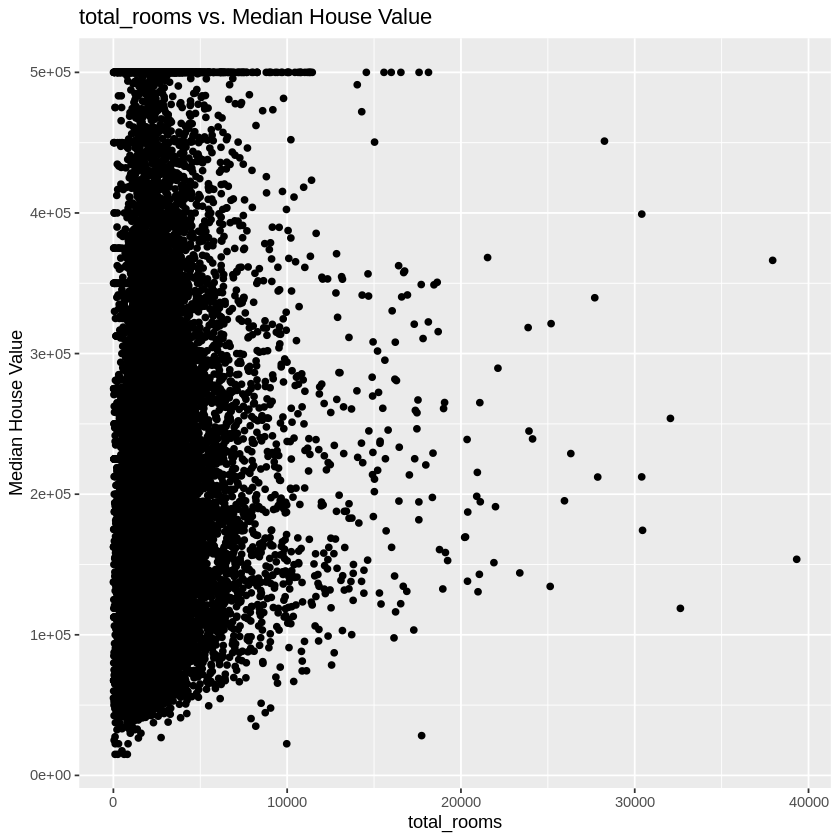

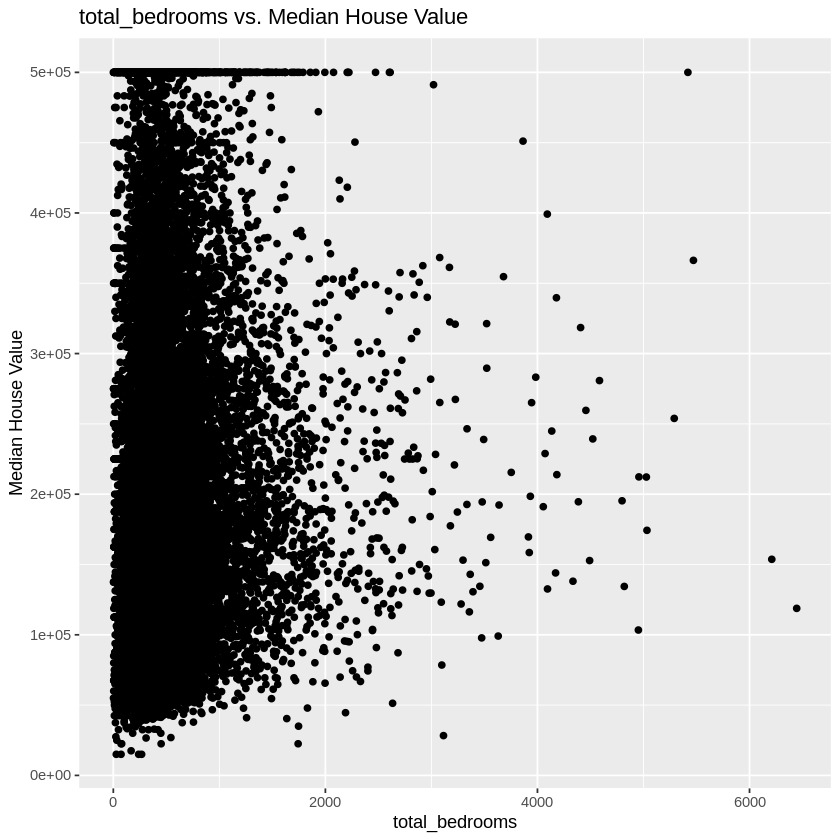

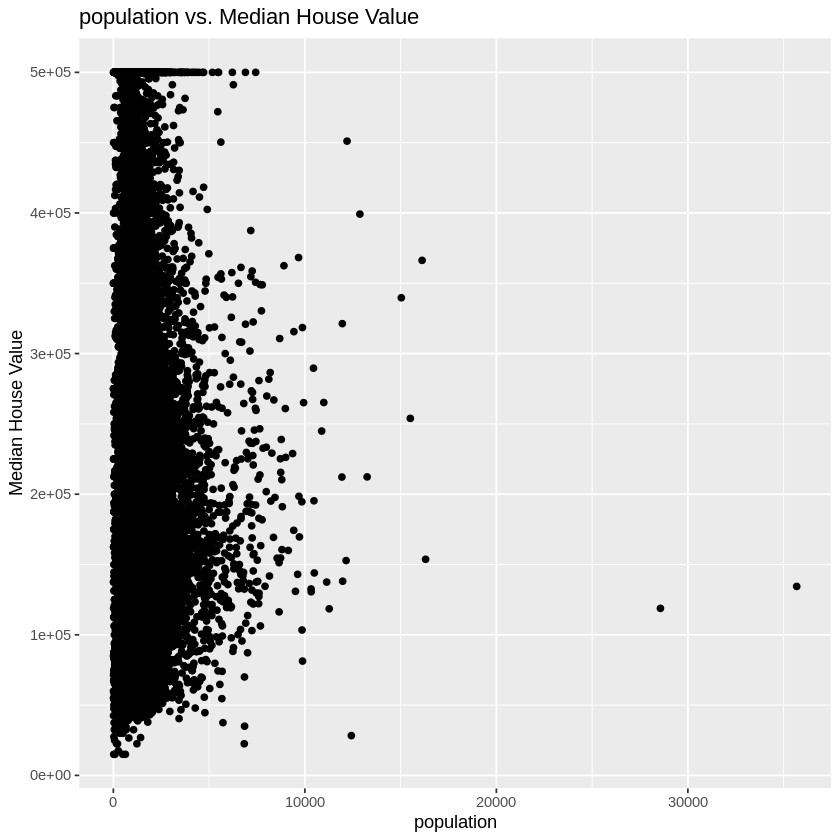

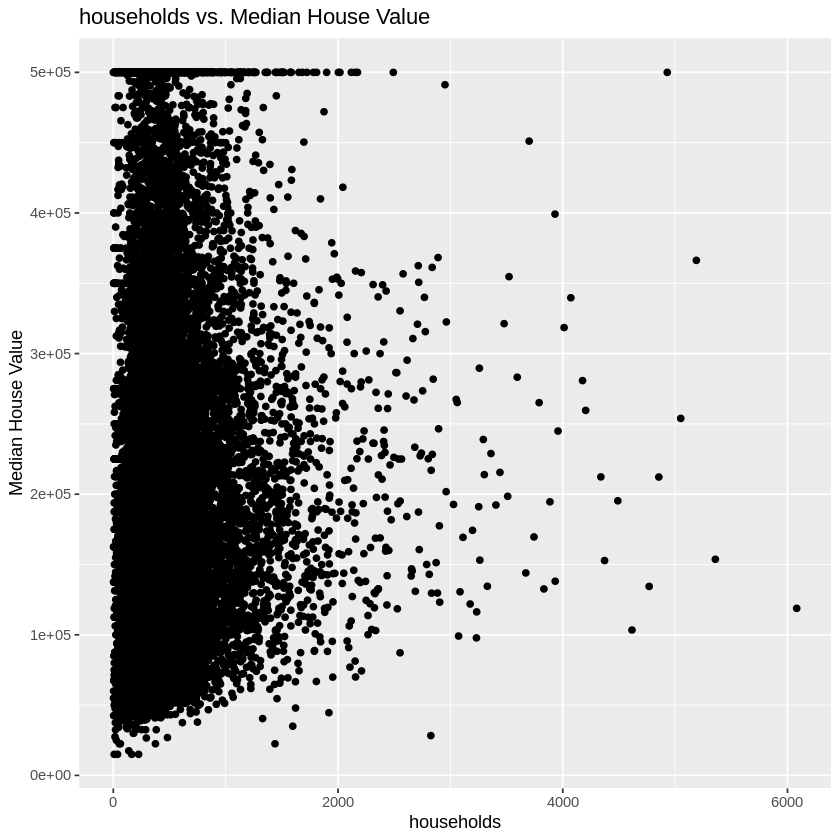

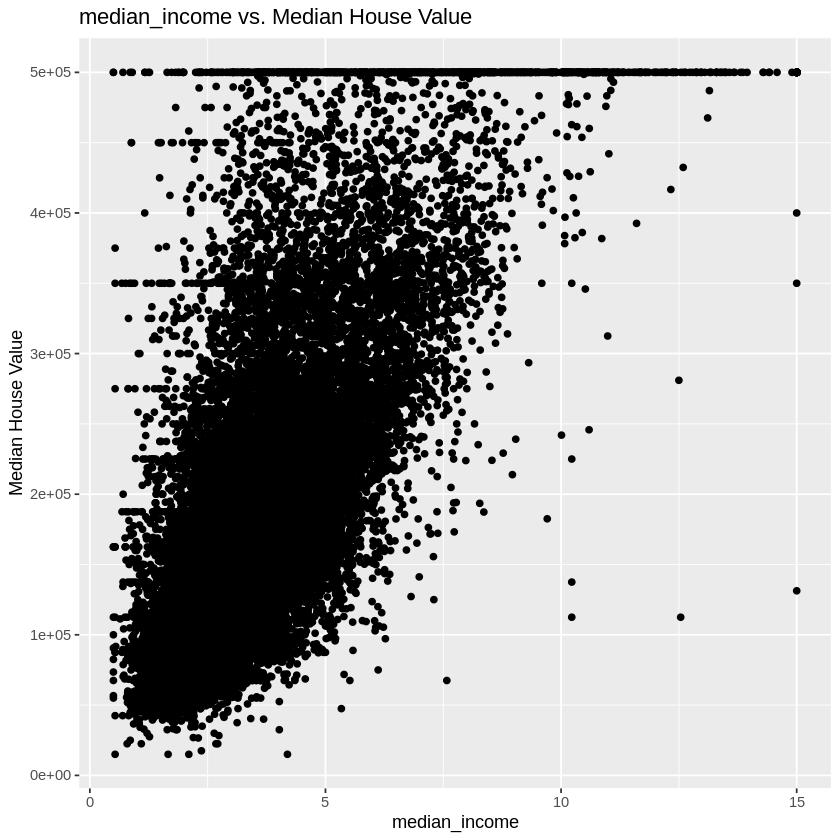

In [21]:
# List of explanatory variables
explanatory_vars <- c("longitude", "latitude", "housing_median_age", "total_rooms", 
                      "total_bedrooms", "population", "households", "median_income")

# Create scatter plots for each explanatory variable
for (var in explanatory_vars) {
  # Create ggplot object
  p <- ggplot(housing, aes_string(x = var, y = "median_house_value")) +
    geom_point() +
    labs(title = paste(var, "vs. Median House Value"),
         x = var, y = "Median House Value")
  
  # Print the plot
  print(p)
}

 - According to each plot, we can see the relationship between each numerical and response variable. If there is an obvious relationship (such as positive or negative correlation), we can temporarily assume that it is a significant term for the prediction model.

## Create a plot with 1 category variable (ocean_proximity) and 1 numerical variable(median income)

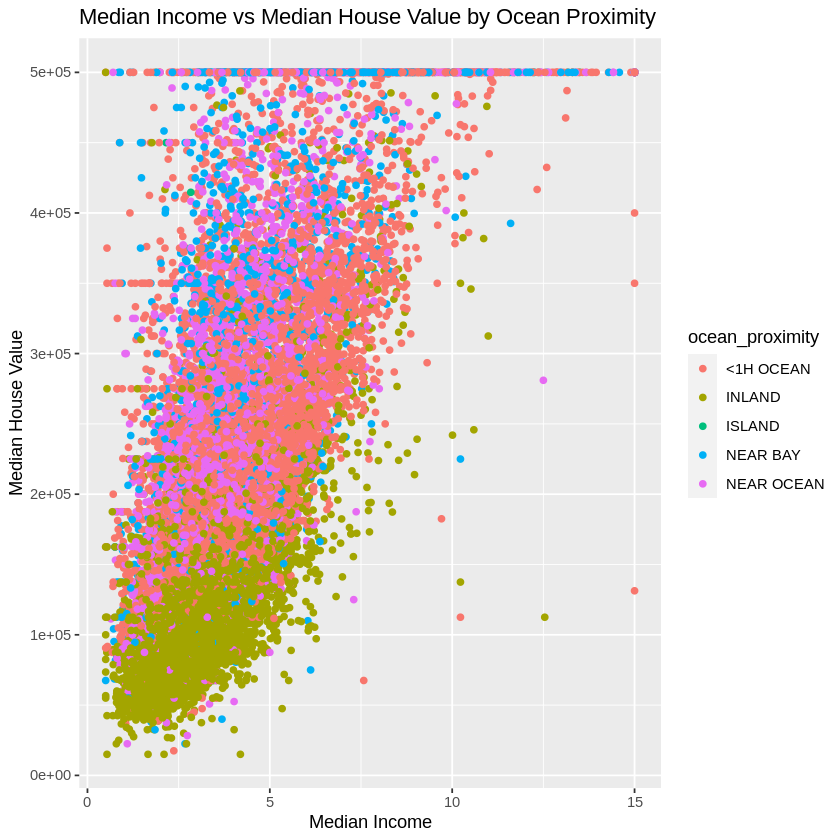

In [22]:
# Create ggplot for median income vs median house value, segmented by ocean proximity
ggplot(housing, aes(x = median_income, y = median_house_value, color = ocean_proximity)) +
  geom_point() +
  labs(title = "Median Income vs Median House Value by Ocean Proximity",
       x = "Median Income", y = "Median House Value")

 - In the previous section, the scatterplot of median income and response variable showed the positive relationship between them. Therefore, based on this plot, we choose to add ocean proximity as another input variable to check whether it also has a positive relation with the response variable.

- Through plot, we guess that ocean proximity is also a significant term for the predictive model, because according to the figure we can see that there is a positive relationship between ocean proximity and response variable.

## Create the residual plot

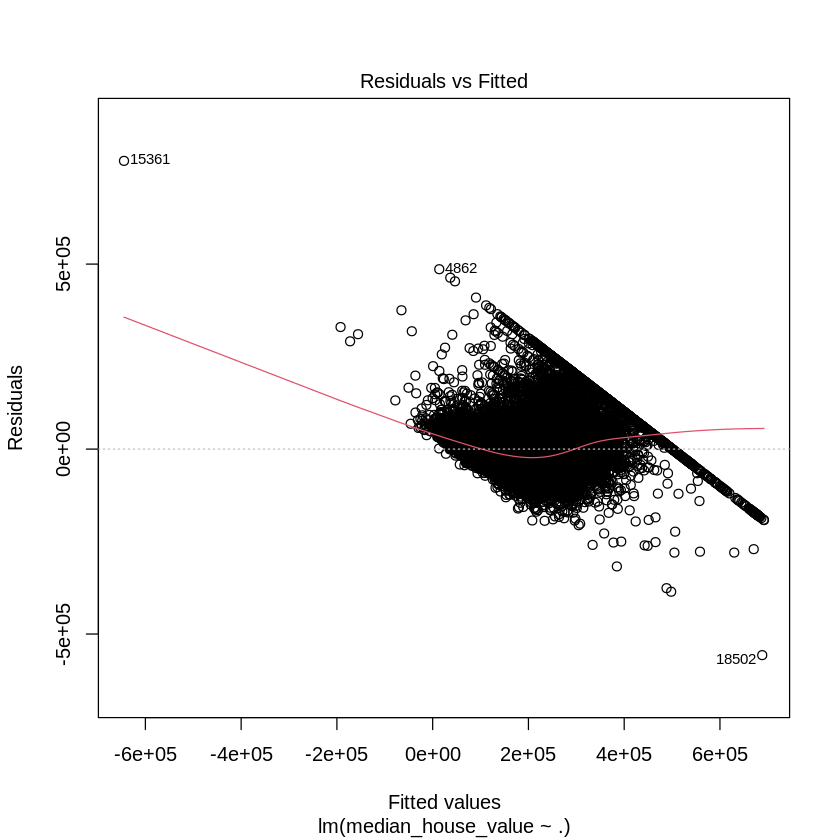

In [23]:
## make residual plot for full model
housing_full_model = lm(median_house_value~.,data = housing)
plot(housing_full_model,1)

 - The residual plot of the full looks not acceptable. As we mentioned before, we first remove the longitude and latitude variables

In [24]:
## remove longitude and latitude from dataset
housing1 = housing|>
    select(-longitude,-latitude)

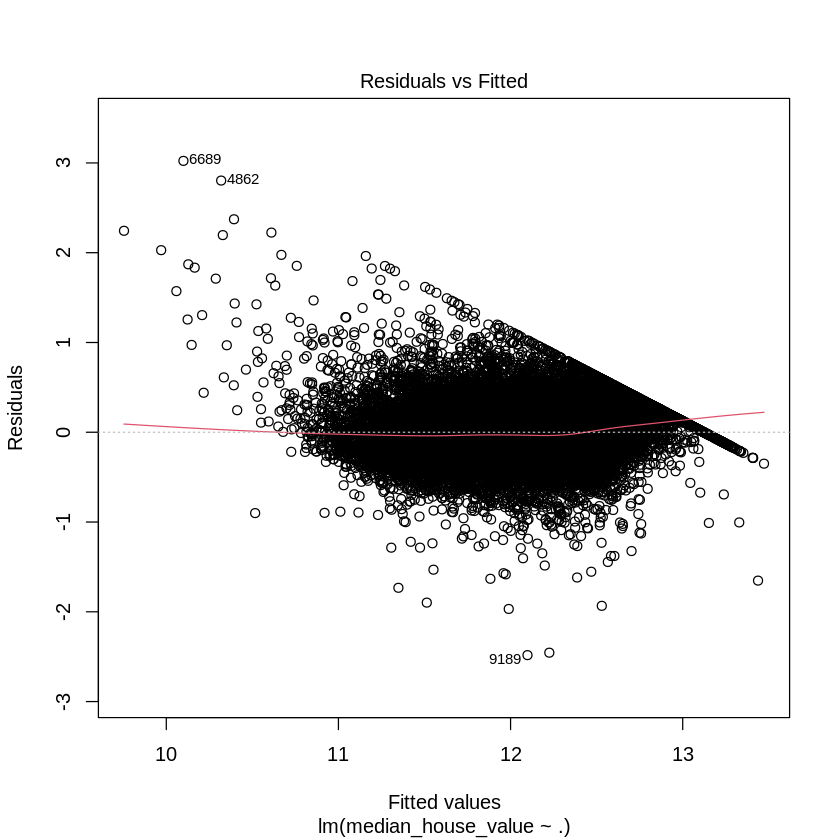

In [25]:
## add log to the response variable then make residual plot again
log_housing <- housing1 %>%
  mutate(across(where(is.numeric), log))
housing_log_model = lm(median_house_value~.,log_housing)
plot(housing_log_model,1)

## Create the Q-Q plot

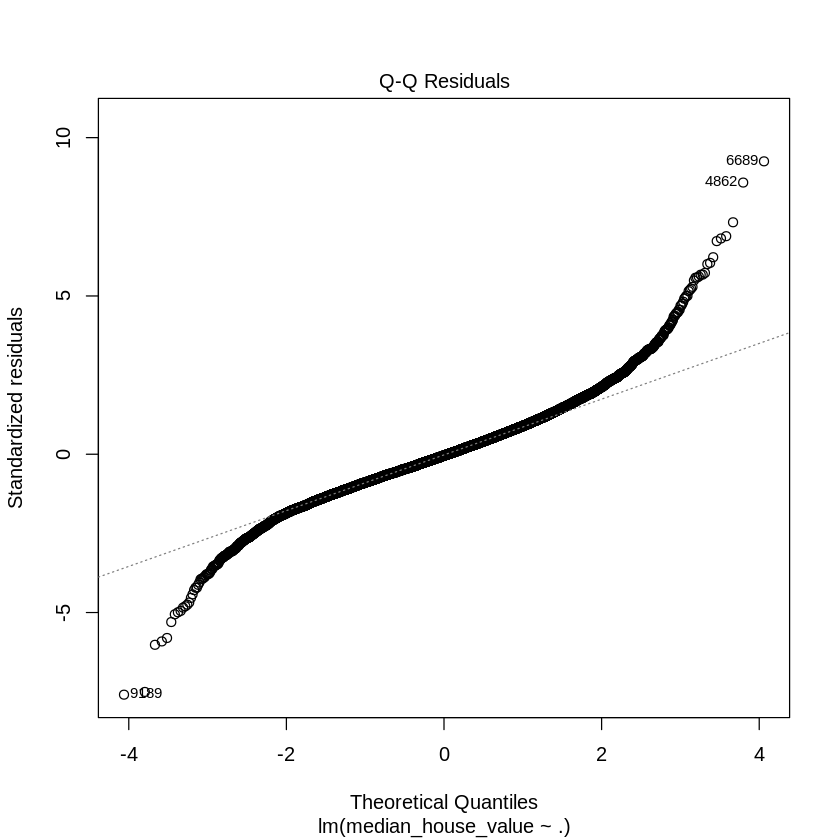

In [26]:
## make the qq plot for the dataset after remove 2 variables
plot(housing_log_model,2)

## Method to find best predictive model

In [27]:
## Check the VIF dor all 7 input variables now
round(vif(housing_log_model),3)

,GVIF,Df,GVIF^(1/(2*Df))
housing_median_age,1.245,1,1.116
total_rooms,25.295,1,5.029
total_bedrooms,40.072,1,6.330
population,8.223,1,2.868
households,32.134,1,5.669
median_income,2.839,1,1.685
ocean_proximity,1.537,4,1.055


 - High GVIF value means collinearity may exist in the dataset. To avoid this, the term with highest GVIF value should be removed. In this case, it is total_bedrooms.

In [28]:
## Remove total_bedrooms then check GVIF again
log_housing_2 = log_housing|>
    select(-total_bedrooms)
housing_log_model2 = lm(median_house_value~.,log_housing_2)
round(vif(housing_log_model2),3)

,GVIF,Df,GVIF^(1/(2*Df))
housing_median_age,1.227,1,1.108
total_rooms,13.732,1,3.706
population,7.941,1,2.818
households,19.867,1,4.457
median_income,1.861,1,1.364
ocean_proximity,1.465,4,1.049


 - "households" has highest value of GVIF, which is almost 20. It is still too high to show there is no collinearity now. Therefore we decided to remove it from dataset now.

In [29]:
## Remove "households" then check GVIF again
log_housing_3 = log_housing_2|>
    select(-households)
housing_log_model3 = lm(median_house_value~.,log_housing_3)
round(vif(housing_log_model3),3)

,GVIF,Df,GVIF^(1/(2*Df))
housing_median_age,1.226,1,1.107
total_rooms,5.499,1,2.345
population,5.083,1,2.255
median_income,1.444,1,1.202
ocean_proximity,1.302,4,1.034


 - Now for the remaining five input variables, the highest GVIF value is only about 5. We think this value is acceptable for proving that there is no strong collinearity between variables.

- Our next step is to choose a selection method to select the most appropriate variable from the five variables contained in this table to only make the best predictive model.

In [30]:

log_housing_3$ID = 1:nrow(log_housing_3)
housing_train = 
    slice_sample(log_housing_3, prop = 0.70) 
housing_test = 
    log_housing_3 %>%
    anti_join(housing_train, by = "ID")
housing_train = housing_train %>% select(- "ID")
housing_test = housing_test %>% select(- "ID")
housing_forward = regsubsets(
    x = median_house_value ~., nvmax = 5,
    data = housing_train,
    method = "forward")
summary_housing_forward = summary(housing_forward)
summary_housing_forward
summary_housing_forward$cp

Subset selection object
Call: regsubsets.formula(x = median_house_value ~ ., nvmax = 5, data = housing_train, 
    method = "forward")
8 Variables  (and intercept)
                          Forced in Forced out
housing_median_age            FALSE      FALSE
total_rooms                   FALSE      FALSE
population                    FALSE      FALSE
median_income                 FALSE      FALSE
ocean_proximityINLAND         FALSE      FALSE
ocean_proximityISLAND         FALSE      FALSE
ocean_proximityNEAR BAY       FALSE      FALSE
ocean_proximityNEAR OCEAN     FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: forward
         housing_median_age total_rooms population median_income
1  ( 1 ) " "                " "         " "        "*"          
2  ( 1 ) " "                " "         " "        "*"          
3  ( 1 ) " "                "*"         " "        "*"          
4  ( 1 ) " "                "*"         "*"        "*"          
5  ( 1 ) "*"                

[1] 7742.04472  874.11855  811.75503  121.73918   21.88438

In [31]:
housing_train_model = lm(median_house_value~.,housing_train)
rmse = function(u,v){
    sqrt(mean((u-v)^2))
    }
u=housing_test$median_house_value
v=predict(housing_train_model,housing_test)
rmse(u,v)

[1] 0.3443755